<img src="Assigment 1.jpg" width="1200" height="150" align="center">

## **- INTRODUCTION DATASET**
---

**ABOUT**

Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

**Features :**
- **`lsoa_code`**: code for Lower Super Output Area (LSOA) in Greater London.
- **`borough`**: Common name for London borough.
- **`major_category`**: Kategori kejahatan tingkat tinggi
- **`minor_category`**: Kategori kejahatan tingkat rendah dibandingkan dengan major_category
- **`value`**: Jumlah laporan kejahatan yang dilaporkan tiap bulannya di wilayah tertentu
- **`year`**: Year of reported counts, 2008-2016
- **`month`**: Month of reported counts, 1-12

**Dtypes :**
- **`lsoa_code`**: object
- **`borough`**: object
- **`major_category`**: object
- **`minor_category`**: object
- **`value`**: int64
- **`year`**: int64
- **`month`**: int64

*cek dtypes -> df.info()

In [264]:
# jumlah data
len(df)

13490604

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## **- IMPORT PUSTAKA**
---

In [266]:
import pandas as pd # primary data structure library # untuk mengolah data
import numpy as np # useful for many scientific computing in Python
import math

import matplotlib.pyplot as plt # untuk memplotting
import seaborn as sns # untuk visualisasi data

from wordcloud import WordCloud, STOPWORDS
import folium

import requests # untuk akses website yang akan kita scrap atau ambil datanya
from bs4 import BeautifulSoup as bs4 # untuk proses web scrapping jauh lebih mudah
from ast import Pass

## **- DATA LOADING**
---

In [267]:
# get data london_crime_by_lsoa.csv
df = pd.read_csv('london_crime_by_lsoa.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [268]:
# get data london_borough.csv
lat_long = pd.read_csv('london_boroughs.csv')
print(type(lat_long))
print(lat_long.head())

FileNotFoundError: [Errno 2] No such file or directory: 'london_boroughs.csv'

## **- DATA CLEANING**
---

In [ ]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### **DATA PREPARATION**

#### **Data 1**
> data tidak ada missing values/ 0 values

In [ ]:
from numpy import nan
# replace '0' values with 'nan'
df1 = df.replace(0, nan)
# count the number of nan values in each column
print(df1.isnull().sum())

lsoa_code                0
borough                  0
major_category           0
minor_category           0
value             10071505
year                     0
month                    0
dtype: int64


In [ ]:
# summarize the first 20 rows of data 
print(df1.head(10))
print(df1.shape)

   lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   
5  E01001320      Ealing           Theft and Handling   
6  E01001342      Ealing  Violence Against the Person   
7  E01002633    Hounslow                      Robbery   
8  E01003496      Newham              Criminal Damage   
9  E01004177      Sutton           Theft and Handling   

                      minor_category  value  year  month  
0        Burglary in Other Buildings    NaN  2016     11  
1                     Other violence    NaN  2016     11  
2                     Other violence    NaN  2015      5  
3        Burglary in Other Buildings    NaN  2016      3  
4                  Personal Property    NaN  2008      6  
5                 

In [ ]:
# drop rows with missing values
df1.dropna(inplace=True)
# summarize the shape of the data with missing rows removed 
print(df1.shape)

(3419099, 7)


In [ ]:
df2 = df1.copy()
df2

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1.0,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1.0,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2.0,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1.0,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1.0,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3.0,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1.0,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1.0,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2.0,2013,7


#### **Data 3**
> data year, borough, dan value

In [ ]:
df3=pd.DataFrame(df[['year', 'borough', 'value']])
df3

,year,borough,value
0,2016,Croydon,0
1,2016,Greenwich,0
2,2015,Bromley,0
3,2016,Redbridge,0
4,2008,Wandsworth,0
...,...,...,...
13490599,2015,Brent,0
13490600,2015,Hillingdon,1
13490601,2011,Sutton,0
13490602,2011,Croydon,0


#### **Data 4**
> data borough dan value

In [ ]:
df4=pd.DataFrame(df[['borough', 'value']])
df4

,borough,value
0,Croydon,0
1,Greenwich,0
2,Bromley,0
3,Redbridge,0
4,Wandsworth,0
...,...,...
13490599,Brent,0
13490600,Hillingdon,1
13490601,Sutton,0
13490602,Croydon,0


#### **Data 5**
> data year dan value

In [ ]:
df5=pd.DataFrame(df[['year', 'value']])
df5

,year,value
0,2016,0
1,2016,0
2,2015,0
3,2016,0
4,2008,0
...,...,...
13490599,2015,0
13490600,2015,1
13490601,2011,0
13490602,2011,0


### **DATA GROUPING**

#### **Group 1 : Area Plot, Histogram, Pie Chart, Box Plot**

In [ ]:
# Pengelompokkkan berdasarkan year dan borough
# Penjumlahan value
groupby_yb = pd.DataFrame(df.groupby(['year', 'borough'],
                          as_index=False)['value'].sum())

groupby_yb.head()

# TERPAKAI

,year,borough,value
0,2008,Barking and Dagenham,17656
1,2008,Barnet,23944
2,2008,Bexley,15305
3,2008,Brent,23504
4,2008,Bromley,24015


In [ ]:
groupby_yb['year'].dtype

dtype('int64')

In [ ]:
data_yb = groupby_yb.pivot(index='year',
                           columns='borough', values='value')

data_yb

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [ ]:
data_by = pd.DataFrame(data_yb.transpose())
data_by.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [ ]:
data_by[2008].head()

borough
Barking and Dagenham    17656
Barnet                  23944
Bexley                  15305
Brent                   23504
Bromley                 24015
Name: 2008, dtype: int64

#### **Group 2 : Bar Chart**

In [ ]:
groupby_yv = pd.DataFrame(df5.groupby(["year"], as_index=False)["value"].sum())
groupby_yv = groupby_yv.rename({'value':'total'},axis=1)
groupby_yv

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


In [ ]:
groupby_yv = groupby_yv.set_index('year')

In [ ]:
groupby_yv

,total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


#### **Group 3 : Word Clouds**

In [ ]:
groupby_bv = pd.DataFrame(df4.groupby(["borough"], as_index=False)["value"].sum())
groupby_bv = groupby_bv.rename({'value':'total'},axis=1)
groupby_bv

,borough,total
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [ ]:
Westminster = data_yb.iloc[:,32:]
Westminster.head()

# TIDAK TERPAKAI

borough,Westminster
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226


## **- EXPLORATORY DATA ANALYSIS**
---

### *1. AREA PLOT*

**`Question`** : Visualisasikan 5 wilayah london teratas yang menyumbang paling banyak insiden kejahatan. Kemudian, simpulkan wilayah yang paling banyak menyumbang insiden kejahatan

**`Data`** : df

**`Grouping`** : groupby_yb1

In [ ]:
# penjumlahan value berdasarkan year dan borough
groupby_yb1 = pd.DataFrame(df.groupby(['year', 'borough'],
                          as_index=False)['value'].sum())

# membuat table pivot data_yb
data_yb1 = groupby_yb1.pivot(index='year',
                          columns='borough',
                          values='value')

# mentranspose table pivot data_yb
data_by1 = pd.DataFrame(data_yb1.transpose())

# buat kolom baru yaitu 'Total'
# yang isinya hasil penjumlahan tiap baris
data_by1['Total'] = data_by1.sum(axis=1)

# mengurutkan values 'Total' dari paling besar
data_by1_sorted = data_by1.sort_values(['Total'],
                                     ascending=False)

# memilih 5 baris teratas
data_by1_sorted_top5 = data_by1_sorted.head()

data_by1_sorted_top5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [ ]:
data_by1_sorted_top5 = pd.DataFrame(data_by1_sorted_top5.transpose())
data_by1_sorted_top5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [ ]:
# hapus kolom 'Total'
data_by1_sorted_minus_total = data_by1_sorted_top5.drop('Total', axis=0)
data_by1_sorted_minus_total

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


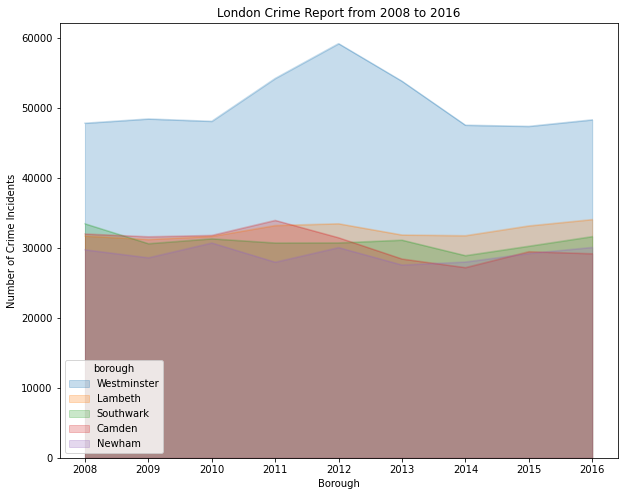

In [ ]:
# membuat plot area
data_by1_sorted_minus_total.plot(kind='area',
                                alpha=0.25,
                                stacked=False,
                                figsize=(10,8))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of Crime Incidents') # add y-label to the plot
plt.title('London Crime Report from 2008 to 2016') # add title to the plot

plt.show()

Berdasarkan hasil diagram diatas menunjukkan bahwa Westminster adalah wilayah yang menyumbang paling banyak insiden kejahatan di London pada tahun 2008.

### *2. HISTOGRAM*

**`Question`** : Visualisasikan distribusi frekuensi jumlah insiden kejahatan dari berbagai wilayah di London pada tahun 2008

**`Data`** : df

**`Grouping`** : groupby_yb2

In [ ]:

groupby_yb2 = pd.DataFrame(df.groupby(['year', 'borough'],
                          as_index=False)['value'].sum())

data_yb2 = groupby_yb2.pivot(index='year',
                           columns='borough', values='value')
#
data_by2 = pd.DataFrame(data_yb2.transpose())
# banyaknya borough
print(data_by2[2008].count())

data_by2_2008 = pd.DataFrame(data_by2[2008])
data_by2_2008.head()

33


,2008
borough,
Barking and Dagenham,17656
Barnet,23944
Bexley,15305
Brent,23504
Bromley,24015


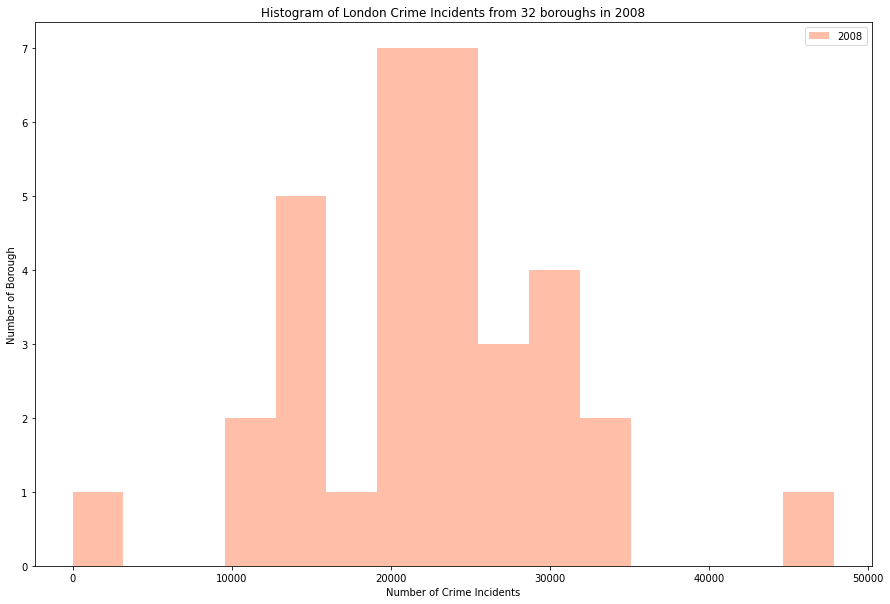

In [ ]:
data_by2_2008.plot(kind='hist',
                    figsize=(15, 10),
                    bins=15,
                    alpha=0.5,
                    color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of London Crime Incidents from 32 boroughs in 2008') # add a title to the histogram
plt.ylabel('Number of Borough') # add y-label
plt.xlabel('Number of Crime Incidents') # add x-label

plt.show()

Berdasarkan hasil diagram diatas menunjukkan jumlah wilayah di London yang dikelompokkan berdasarkan jumlah total insiden kejahatan tiap wilayah.

### *3. BAR CHART*

**`Question`** : Visualisasikan jumlah total insiden kejahatan di London dari tahun 2008 hingga 2016

**`Data`** : df

**`Grouping`** : groupby_yv3

In [ ]:
data_yv3 = pd.DataFrame(df[['year', 'value']])

groupby_yv3 = pd.DataFrame(data_yv3.groupby(["year"],
                      as_index=False)["value"].sum())

groupby_yv3 = groupby_yv3.rename({'value':'total'},axis=1)

groupby_yv3 = groupby_yv3.set_index('year')

groupby_yv3

,total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


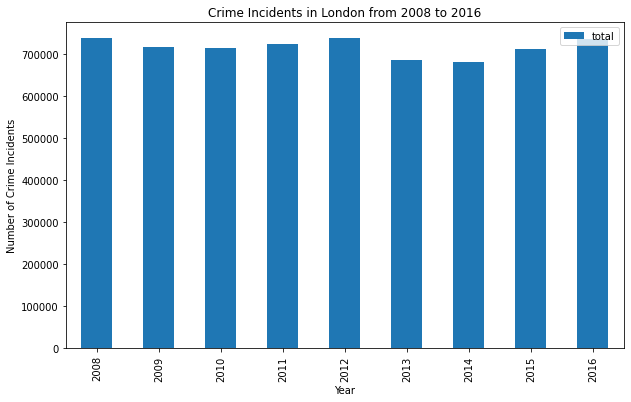

In [ ]:
groupby_yv3.plot(kind='bar', figsize=(10,6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Crime Incidents') # add y-label to the plot
plt.title('Crime Incidents in London from 2008 to 2016') # add title to the plot

plt.show()

Berdasarkan hasil diagram diatas menunjukkan jumlah total insiden kejahatan yang dikelompokkan setiap tahun.

### *4. PIE CHART*

**`Question`** : Visualisasikan persentase wilayah-wilayah london berdasarkan banyaknya insiden kejahatan

**`Data`** : df

**`Grouping`** : groupby_yb4

In [ ]:
# penjumlahan value berdasarkan year dan borough
groupby_yb4 = pd.DataFrame(df.groupby(['year', 'borough'],
                          as_index=False)['value'].sum())

# membuat table pivot data_yb
data_yb4 = groupby_yb4.pivot(index='year',
                          columns='borough',
                          values='value')

# mentranspose table pivot data_yb
data_by4 = pd.DataFrame(data_yb4.transpose())

# buat kolom baru yaitu 'Total'
# yang isinya hasil penjumlahan tiap baris
data_by4['Total'] = data_by4.sum(axis=1)

# mengurutkan values 'Total' dari paling besar
data_by_sorted4 = data_by4.sort_values(['Total'],
                                     ascending=False)

# memilih 5 baris teratas
data_by4_sorted_top5 = data_by_sorted4.head()

data_by4_sorted_top5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


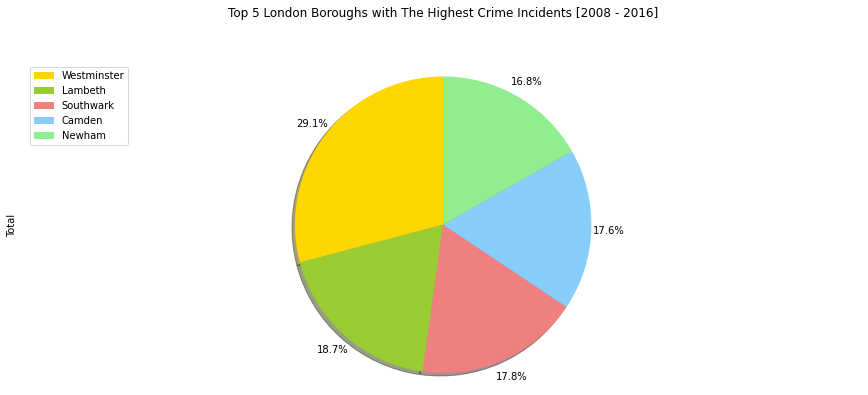

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

# autopct create %, start angle represent starting point
data_by4_sorted_top5['Total'].plot(kind='pie',
                                  figsize=(15, 6),
                                  autopct='%1.1f%%', # add in percentages
                                  startangle=90,     # start angle 90° (Africa)
                                  shadow=True,       # add shadow
                                  labels=None,
                                  pctdistance=1.12,
                                  colors=colors_list,
                                  explode=None
                                  )             
                                  

plt.title('Top 5 London Boroughs with The Highest Crime Incidents [2008 - 2016]', y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.

# add legend
plt.legend(labels=data_by4_sorted_top5.index, loc='upper left') 

plt.show()

Berdasarkan plot diatas menunjukkan bahwa 5 wilayah London dengan insiden kejahatan tertinggi yaitu :
1. Westminster dengan 29.1%
2. Lambeth dengan 18.7%
3. Southwark dengan 17.8%
4. Camden dengan 17.6%
5. Newham dengan 16.8%

### *5. BOX PLOT*

**`Question`** : Visualisasikan 2 wilayah dengan paling banyak insiden kejahatan

**`Data`** : df

**`Grouping`** : groupby_bv5

In [269]:
groupby_bv5 = df.groupby(['borough'])['value'].max() \
                                .sort_values(ascending=False) \
                                .head(2) \
                                .sort_values() \
                                .reset_index() \
                                
                                
data_bv5 = pd.DataFrame(groupby_bv5)
data_bv5

,borough,value
0,Westminster,300
1,Tower Hamlets,309


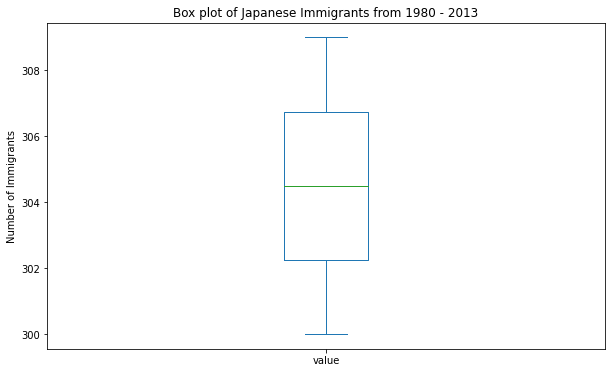

In [270]:
data_bv5.plot(kind='box', figsize=(10,6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Berdasarkan plot diatas, kita dapat segera membuat beberapa observasi penting :
1. Jumlah minimum imgran sekitar 200 (min), jumlah maksimum sekitar 1300 (max), dan jumlah rata-rata imigran sekitar 900 (median)
2. 25% untuk periode 1980 - 2013 memiliki jumlah imigran tahunan ~500 atau kurang (Kuartil Pertama)
3. 75% untuk periode 1980 - 2013 memiliki jumlah imigran tahunan ~1100 atau kurang (Kuartil Ketiga)

In [271]:
data_bv5.describe()

,value
count,2.000000
mean,304.500000
std,6.363961
min,300.000000
25%,302.250000
50%,304.500000
75%,306.750000
max,309.000000


### *6. SCATTER PLOT*

**`Question`** : Visualisasikan tren total insiden kejahatan di London dari 2008-2013

**`Data`** : df

**`Grouping`** : groupby_yv6

In [272]:
data_yv6 = pd.DataFrame(df[['year', 'value']])

groupby_yv6 = pd.DataFrame(data_yv6.groupby(["year"],
                      as_index=False)["value"].sum())

groupby_yv6 = groupby_yv6.rename({'value':'total'},axis=1)

groupby_yv6

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


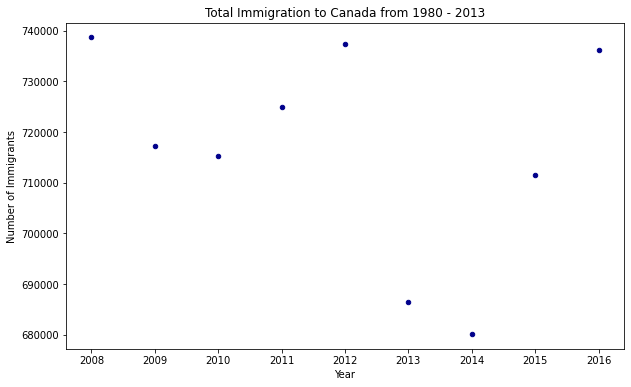

In [273]:
groupby_yv6.plot(kind='scatter',
            x='year',
            y='total',
            figsize=(10, 6),
            color='darkblue'
            )

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### *7. WORD CLOUDS*

**`Question`** : Buat word clouds dengan daftar london boroughs

**`Data`** : df

In [274]:
# penjumlahan value berdasarkan year dan borough
groupby_yb7 = pd.DataFrame(df.groupby(['year', 'borough'],
                          as_index=False)['value'].sum())

# membuat table pivot data_yb
data_bv7 = groupby_yb7.pivot(index='year',
                          columns='borough',
                          values='value')

# mentranspose table pivot data_yb
data_bv7 = pd.DataFrame(data_bv7.transpose())

# buat kolom baru yaitu 'Total'
# yang isinya hasil penjumlahan tiap baris
data_bv7['Total'] = data_bv7.sum(axis=1)

data_bv7 = data_bv7
data_bv7.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [275]:
total_crimes = data_bv7['Total'].sum()
total_crimes

6447758

In [276]:
from wordcloud import wordcloud, STOPWORDS

max_words = 90
word_string = ''
for borough in data_bv7.index:
    # check if borough's name is a single-word name
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(data_bv7.loc[borough, 'Total']/float(total_crimes)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)

# display the generated text
word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

In [277]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


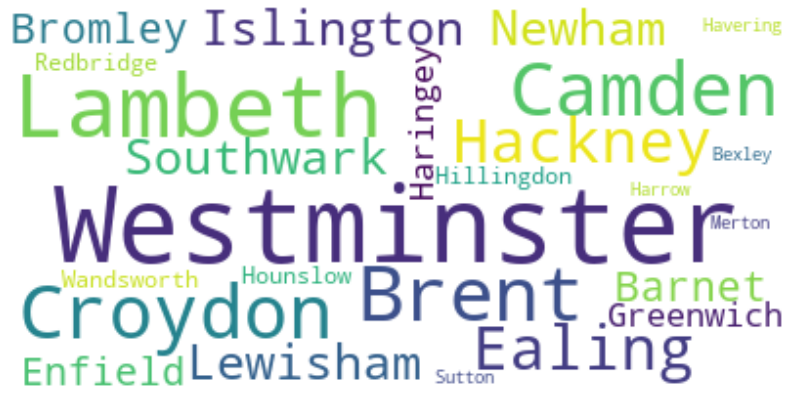

In [278]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### *8. FOLIUM MAPS*

**`Question`** :

**`Data`** : df

In [279]:
# get data london_borough.xlsx
lat_long = pd.read_excel('london_boroughs.xlsx')
print(type(lat_long))
print(lat_long.head())
# count the number of nan values in each column
print(lat_long.isnull().sum())
print(lat_long.shape)

<class 'pandas.core.frame.DataFrame'>
                borough  latitude  longitude
0  Barking and Dagenham  51536563   0.075766
1                Barnet    516050   0.207600
2                Bexley    514399   0.154300
3                 Brent    515673   0.271100
4               Bromley    514060   0.013200
borough      0
latitude     0
longitude    0
dtype: int64
(33, 3)


In [280]:
groupby_bmv8 = pd.DataFrame(df.groupby(["borough", "major_category"], as_index=False)["value"].sum())
groupby_bmv8 = groupby_bmv8.rename({'value':'total'},axis=1)
groupby_bmv8.head()

,borough,major_category,total
0,Barking and Dagenham,Burglary,18103
1,Barking and Dagenham,Criminal Damage,18888
2,Barking and Dagenham,Drugs,9188
3,Barking and Dagenham,Fraud or Forgery,205
4,Barking and Dagenham,Other Notifiable Offences,2819


In [281]:
london_data = pd.merge(groupby_bmv8, lat_long, on='borough')
print(london_data.head())
print(london_data.shape)
print(london_data.dtypes)

                borough             major_category  total  latitude  longitude
0  Barking and Dagenham                   Burglary  18103  51536563   0.075766
1  Barking and Dagenham            Criminal Damage  18888  51536563   0.075766
2  Barking and Dagenham                      Drugs   9188  51536563   0.075766
3  Barking and Dagenham           Fraud or Forgery    205  51536563   0.075766
4  Barking and Dagenham  Other Notifiable Offences   2819  51536563   0.075766
(295, 5)
borough            object
major_category     object
total               int64
latitude            int64
longitude         float64
dtype: object


In [282]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = london_data.iloc[0:limit, :]
df_incidents.shape

(100, 5)

In [283]:
df_incidents.head()

,borough,major_category,total,latitude,longitude
0,Barking and Dagenham,Burglary,18103,51536563,0.075766
1,Barking and Dagenham,Criminal Damage,18888,51536563,0.075766
2,Barking and Dagenham,Drugs,9188,51536563,0.075766
3,Barking and Dagenham,Fraud or Forgery,205,51536563,0.075766
4,Barking and Dagenham,Other Notifiable Offences,2819,51536563,0.075766


In [284]:
# create map and display it
london_map = folium.Map(location=[51.509865, -0.118092],
                        zoom_start=12,
                        control_scale=True)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group 
for lat, lng, borough, in zip(df_incidents.latitude,
                              df_incidents.longitude,
                              df_incidents.major_category):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
london_map.add_child(incidents)

In [285]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group 
for lat, lng, major_category, in zip(df_incidents.latitude,
                              df_incidents.longitude,
                              df_incidents.major_category):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.latitude)
longitudes = list(df_incidents.longitude)
labels = list(df_incidents.major_category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(london_map)    
    
# add incidents to map
london_map.add_child(incidents)